Wood density validation Tapajos (Santarem): Log-Norm Probability Density for TRY Data base vs. LPJmLFIT

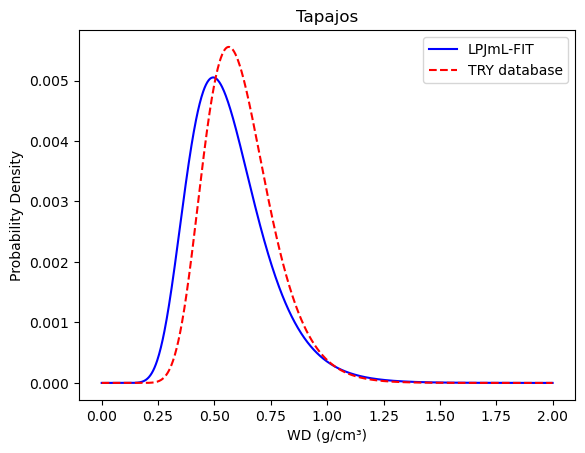

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import lognorm
import xarray as xr
from scipy import stats
import math

# Set path to files
path_validation = '//clusterfs/biodiversity/annavo/validation_data/WD_Santarem.csv'
path_model = '//clusterfs/biodiversity/annavo/LPJmL56Fit/tapajos_none_shuffle_leaftresh3_constc1996/output/wooddens_ind.nc'
selected_column_index = 0  # Replace with the index of the desired column from csv validation file

# Read Files
df_validation = pd.read_csv(path_validation, header=None)  # Since there are no column names, use header=None
data_validation = df_validation.iloc[:, selected_column_index].values

ds_model = xr.open_dataset(path_model)
ds_last30years = ds_model.sel(time=slice('1981', '2011'))
ds_mean_last30years = ds_last30years['num_wooddens'].mean(dim='time')
# Convert the scaled values to integers (assuming they are scaled by a factor of 800)
ds_mean_last30years = ds_mean_last30years * 800 # multiply by number of patches calculated in simulation run to receive information for entire grid cell
ds_mean_last30years = ds_mean_last30years.astype(int)

# Create the new one-dimensional data array
data_array = []
bin_width = 5858.59 * (10**-6) / 0.455 # manually read binwidth from netcdf file and scaled to receive proper unit

# Fill Data Array with Values from nc file
for i, value in enumerate(ds_mean_last30years.values):
    wooddens_value = ds_last30years['wooddens'][i].values * (10**-6) / 0.455
    num_wooddens_value = int(value)

    for _ in range(num_wooddens_value):
        variation = np.random.uniform(-bin_width / 2, bin_width / 2) # randomly add / subtract half of binwidth to receive distinct values instead of range
        data_array.append(wooddens_value + variation)

# Convert the data array to a numpy array for further analysis
data_array = np.array(data_array)

# Calculate parameters for Log-Normal distribution
sigma, loc, scale = stats.lognorm.fit(data_array, floc=0)
mu = np.log(scale)
E = math.exp((mu + (sigma**2/2)))
# Create x values for the PDF plot
x = np.linspace(0, math.ceil(max(data_array)*1.2), 1000)

# Calculate the Log-Normal PDF using mean and standard deviation
pdf = lognorm.pdf(x, sigma, loc=0, scale=np.exp(mu))

# Normalize the PDF so that the area under the curve is equal to 1
pdf /= pdf.sum()

# Plot log-norm pdf for LPJmL-FIT
plt.plot(x, pdf, color='b', linestyle='-', label='LPJmL-FIT')

# Continue with CSV File
# Check for missing values in the data and handle them with NumPy
data = data_validation[~np.isnan(data_validation)]  # Remove rows with NaN values

# assign values exceeding highest bin to highest bin
data[data > max(data_array)] = max(data_array)

# Fit the data to a log-normal distribution using scipy.stats.lognorm
shape, loc, scale = lognorm.fit(data, floc=0)

# Calculate the PDF for the log-normal distribution
pdf = lognorm.pdf(x, shape, loc=loc, scale=scale)

# Normalize the PDF so that the area under the curve is equal to 1
pdf /= pdf.sum()

# Plot the log-normal PDF for the data from the CSV file
plt.plot(x, pdf, color='r', linestyle='--', label='TRY database')

# Set title and legend for the plot
plt.title('Tapajos')
plt.legend()

# Set axis labels for the plot
plt.xlabel('WD (g/cm³)')
plt.ylabel('Probability Density')

# Display the plot
plt.show()


Specific Leaf Area validation Tapajos (Santarem): Log-Norm Probability Density for TRY Data base vs. LPJmLFIT

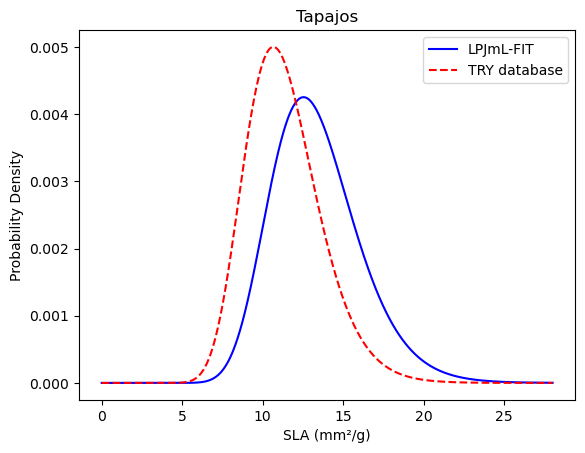

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import lognorm
import xarray as xr

# Set path to input and output files
path_validation = '//clusterfs/biodiversity/annavo/validation_data/SLA_Santarem.csv'
path_model = '//clusterfs/biodiversity/annavo/LPJmL56Fit/tapajos_none_shuffle_leaftresh3_constc1996/output/sla_ind.nc'
selected_column_index = 0  # Replace with the index of the desired column from the CSV validation file

# Read the CSV validation file and extract the desired column
df_validation = pd.read_csv(path_validation, header=None, sep=',', decimal='.')
data_validation = df_validation.iloc[:, selected_column_index].values
data_validation = data_validation[~np.isnan(data_validation)]  # Remove rows with NaN values

# Read data from the model output
ds_model = xr.open_dataset(path_model)
ds_last30years = ds_model.sel(time=slice('1981', '2011'))
ds_mean_last30years = ds_last30years['num_sla'].mean(dim='time')

# Convert data to mm²/g and round to the nearest integer
ds_mean_last30years = ds_mean_last30years * 800 # multiply by number of patches calculated in simulation run to receive information for entire grid cell
ds_mean_last30years = ds_mean_last30years.astype(int)

# Create an array of SLA values from the model data
data_array = []
bin_width = 0.000656566 * 1000 * 0.455 # manually read binwidth from netcdf file and scaled to receive proper unit

for i, value in enumerate(ds_mean_last30years.values):
    sla_value = ds_last30years['sla'][i].values * 1000 * 0.455
    num_sla_value = int(value)

    for _ in range(num_sla_value):
        variation = np.random.uniform(-bin_width / 2, bin_width / 2) # randomly add / subtract half of binwidth to receive distinct values instead of range
        data_array.append(sla_value + variation)

data_array = np.array(data_array)

# Assign values exceeding the highest bin to the highest bin
for i, value in enumerate(data_validation):
    if value > max(data_array):
        data_validation[i] = max(data_array)

# Calculate parameters for Log-Normal distribution
sigma, loc, scale = lognorm.fit(data_array, floc=0)
mu = np.log(scale)
E_model = np.exp(mu + (sigma ** 2 / 2))

# Create an x-axis grid for the plot
x = np.linspace(0, math.ceil(max(data_array) * 1.2), 1000)

# Calculate the Log-Normal PDF using mean and standard deviation
pdf = lognorm.pdf(x, sigma, loc=0, scale=np.exp(mu))

# Normalize the PDF so that the area under the curve is equal to 1
pdf /= pdf.sum()

# Create the plot for log-normal PDF from model data
plt.plot(x, pdf, color='b', linestyle='-', label='LPJmL-FIT')

# Fit the data to a log-normal distribution using scipy.stats.lognorm
shape, loc, scale = lognorm.fit(data_array, floc=0)

# Calculate parameters for Log-Normal distribution
sigma, loc, scale = lognorm.fit(data_validation, floc=0)
mu = np.log(scale)
E_validation = np.exp(mu + (sigma ** 2 / 2))

# Calculate the PDF for the log-normal distribution
pdf = lognorm.pdf(x, shape, loc=loc, scale=scale)

# Normalize the PDF so that the area under the curve is equal to 1
pdf /= pdf.sum()

# Create the plot for log-normal PDF from the CSV validation data
plt.plot(x, pdf, color='r', linestyle='--', label='TRY database')

# Set title and legend for the plot
plt.title('Tapajos')
plt.legend()

# Set axis labels for the plot
plt.xlabel('SLA (mm²/g)')
plt.ylabel('Probability Density')

# Display the plot
plt.show()


Specific Leaf Area validation Paracou (Guyaflux): Log-Norm Probability Density for TRY Data base vs. LPJmLFIT

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import lognorm
import xarray as xr
from scipy.integrate import simps

# Set path to input and output files
path_validation = '//clusterfs/biodiversity/annavo/validation_data/SLA_Paracou_1.csv'
path_model = '//clusterfs/biodiversity/annavo/LPJmL56Fit/paracou_none_shuffle_leaftresh3_constc1996/output/sla_ind.nc'
selected_column_index = 0  # Replace with the index of the desired column from the CSV validation file

# Read the CSV validation file and extract the desired column
df_validation = pd.read_csv(path_validation, header=None, sep=',', decimal='.')
data_validation = df_validation.iloc[:, selected_column_index].values

# Convert the data to numeric values and remove rows with NaN values
data_validation = pd.to_numeric(data_validation, errors='coerce')  # Invalid values will be converted to NaN
data_validation = data_validation[~np.isnan(data_validation)]

# Read data from the model output
ds_model = xr.open_dataset(path_model)
ds_last30years = ds_model.sel(time=slice('1981', '2011'))
ds_mean_last30years = ds_last30years['num_sla'].mean(dim='time')

# Convert data to mm²/g and round to the nearest integer
ds_mean_last30years = ds_mean_last30years * 800 # multiply by number of patches calculated in simulation run to receive information for entire grid cell
ds_mean_last30years = ds_mean_last30years.astype(int)

# Create an array of SLA values from the model data
data_array = []
bin_width = 0.000656566 * 1000 * 0.455 # manually read binwidth from netcdf file and scaled to receive proper unit

for i, value in enumerate(ds_mean_last30years.values):
    sla_value = ds_last30years['sla'][i].values * 1000 * 0.455
    num_sla_value = int(value)

    for _ in range(num_sla_value):
        variation = np.random.uniform(-bin_width / 2, bin_width / 2) # randomly add / subtract half of binwidth to receive distinct values instead of range
        data_array.append(sla_value + variation)

data_array = np.array(data_array)

# Assign values exceeding the highest bin to the highest bin
data_validation[data_validation > max(data_array)] = max(data_array)

# Calculate parameters for Log-Normal distribution from model data
sigma_model, loc_model, scale_model = lognorm.fit(data_array, floc=0)
mu_model = np.log(scale_model)
E_model = np.exp(mu_model + (sigma_model ** 2 / 2))

# Create an x-axis grid for the plot
x = np.linspace(0, np.ceil(max(data_array) * 1.2), 1000)

# Calculate the Log-Normal PDF using mean and standard deviation from model data
pdf_model = lognorm.pdf(x, sigma_model, loc=0, scale=np.exp(mu_model))

# Normalize the PDF so that the area under the curve is equal to 1
pdf_model /= pdf_model.sum()

# Create the plot for log-normal PDF from model data
plt.plot(x, pdf_model, color='b', linestyle='-', label='LPJmL-FIT')

# Calculate parameters for Log-Normal distribution from validation data
sigma_validation, loc_validation, scale_validation = lognorm.fit(data_validation, floc=0)
mu_validation = np.log(scale_validation)
E_validation = np.exp(mu_validation + (sigma_validation ** 2 / 2))

# Calculate the PDF for the log-normal distribution from validation data
pdf_validation = lognorm.pdf(x, sigma_validation, loc=0, scale=scale_validation)

# Normalize the PDF so that the area under the curve is equal to 1
pdf_validation /= pdf_validation.sum()


# Create the plot for log-normal PDF from the CSV validation data
plt.plot(x, pdf_validation, color='r', linestyle='--', label='TRY database')

# Set title and legend for the plot
plt.title('Paracou')
plt.legend()

# Set axis labels for the plot
plt.xlabel('SLA (mm²/g)')
plt.ylabel('Probability Density')

# Display the plot
plt.show()
